# Иерархическая кластеризация

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/cluster_mpg.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Исследование данных

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [11]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

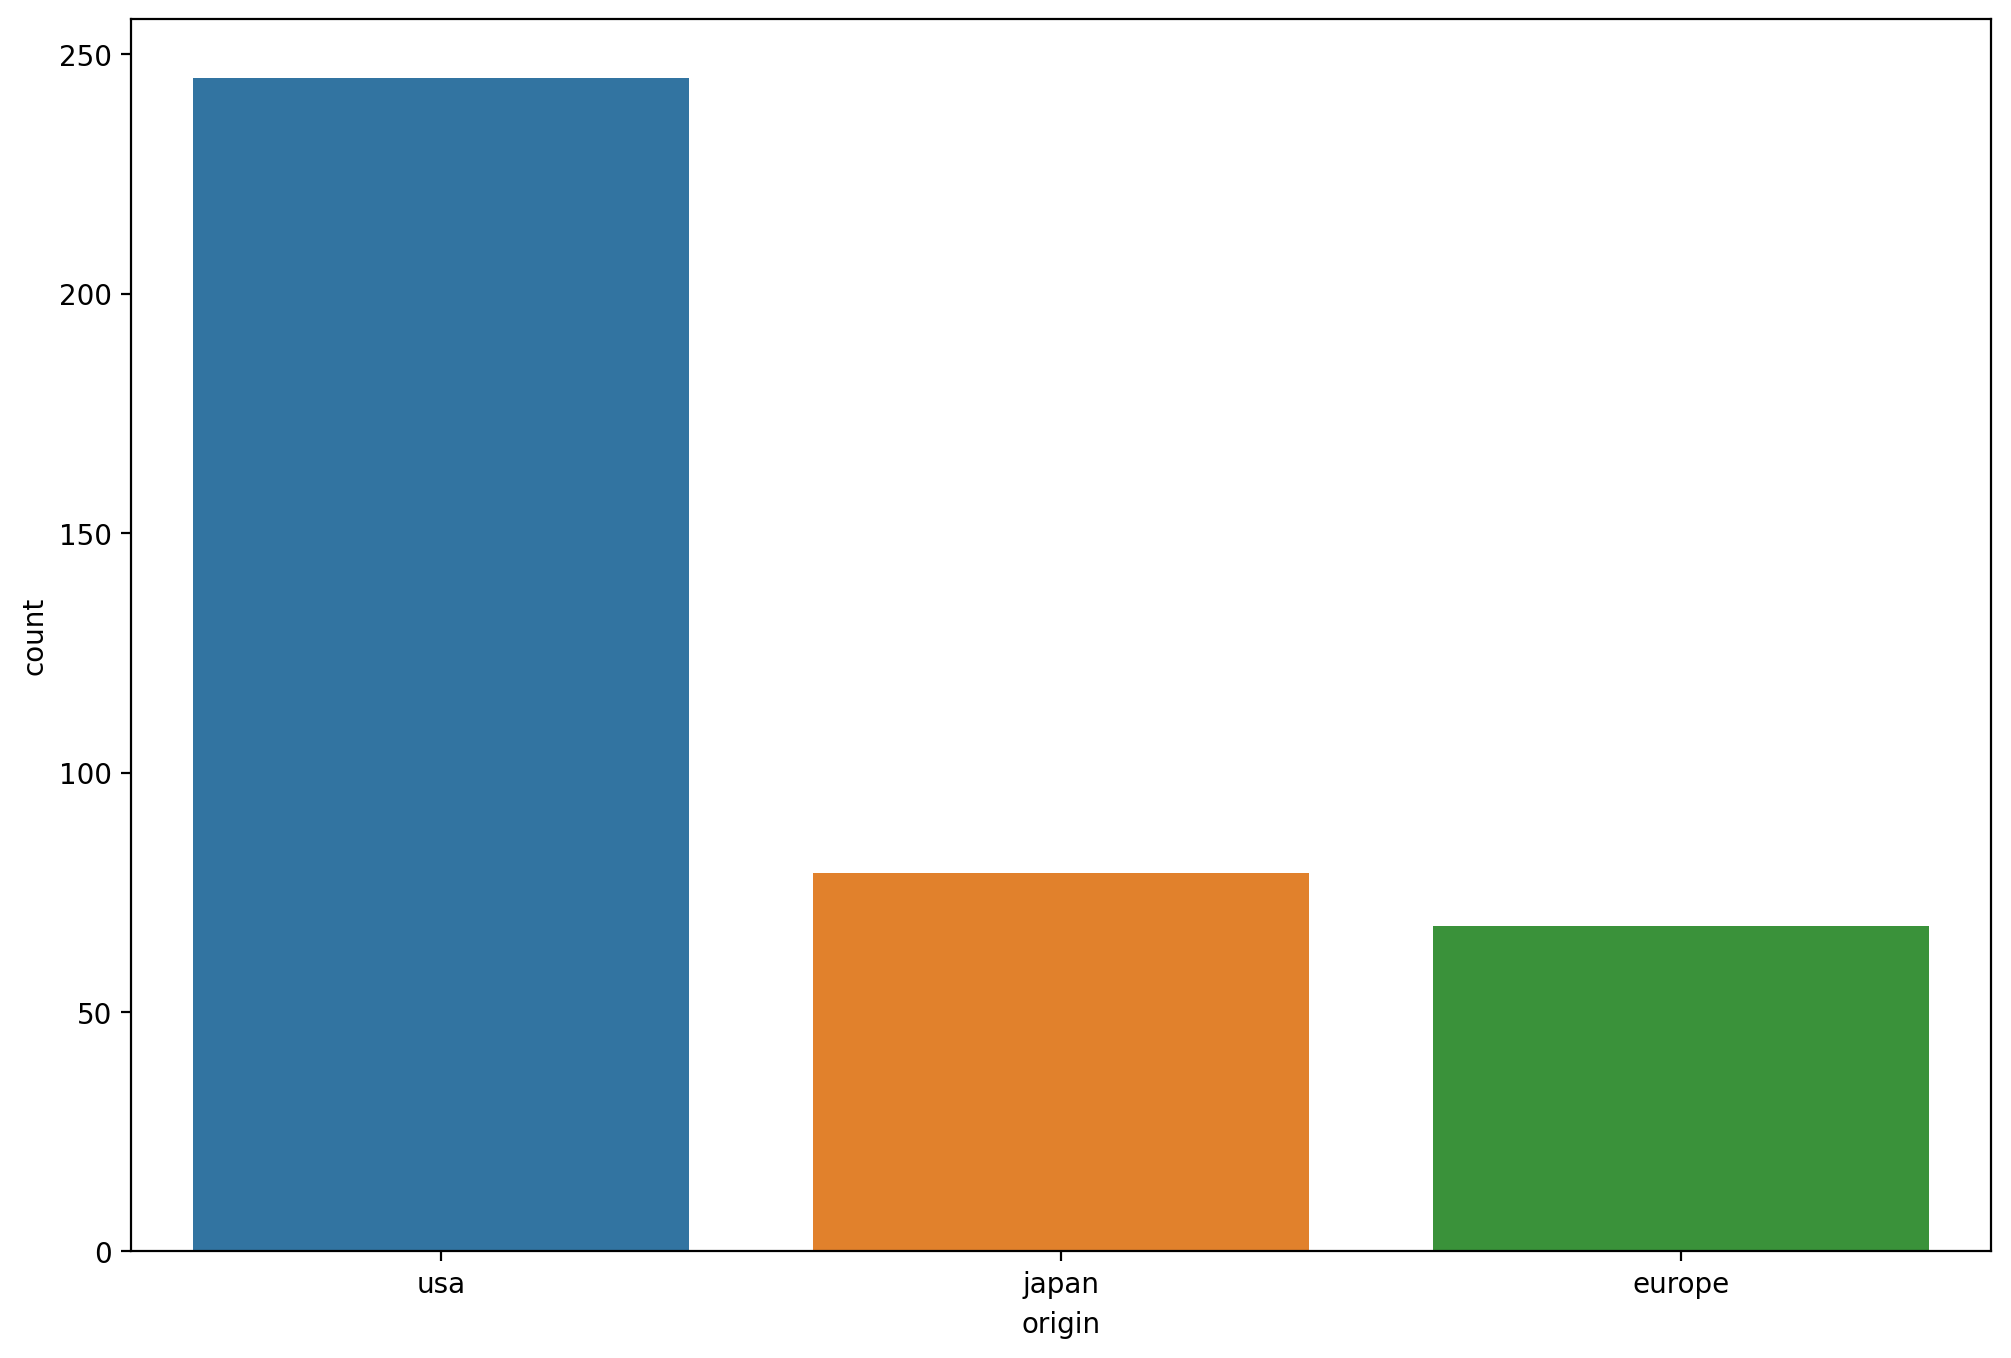

In [13]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='origin', hue='origin')
plt.show()

Создадим дамми переменные для этого признака, причём не будем указывать параметр `drop_first=True`, так как для задач кластеризации наличие дублирующих друг друга колонок не критично.

In [16]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [18]:
df_w_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


## Масштабирование признаков

Для иерархической кластеризации будем применять `MinMaxScaler` - это позволит лучше понять, какое максимальное расстояние между точками.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |
 |  Transform features by scaling each feature to a given range.
 |
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |
 |  The transformation is given by::
 |
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |
 |  where min, max = feature_range.
 |
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one corresponds to

In [26]:
scaler = MinMaxScaler()

In [28]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [30]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

Теперь преобразуем эти данные из массива numpy обратно в датафрейм, чтобы при визуализации данных можно было увидеть названия колонок.

In [33]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

In [35]:
scaled_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


## Визуализация данных

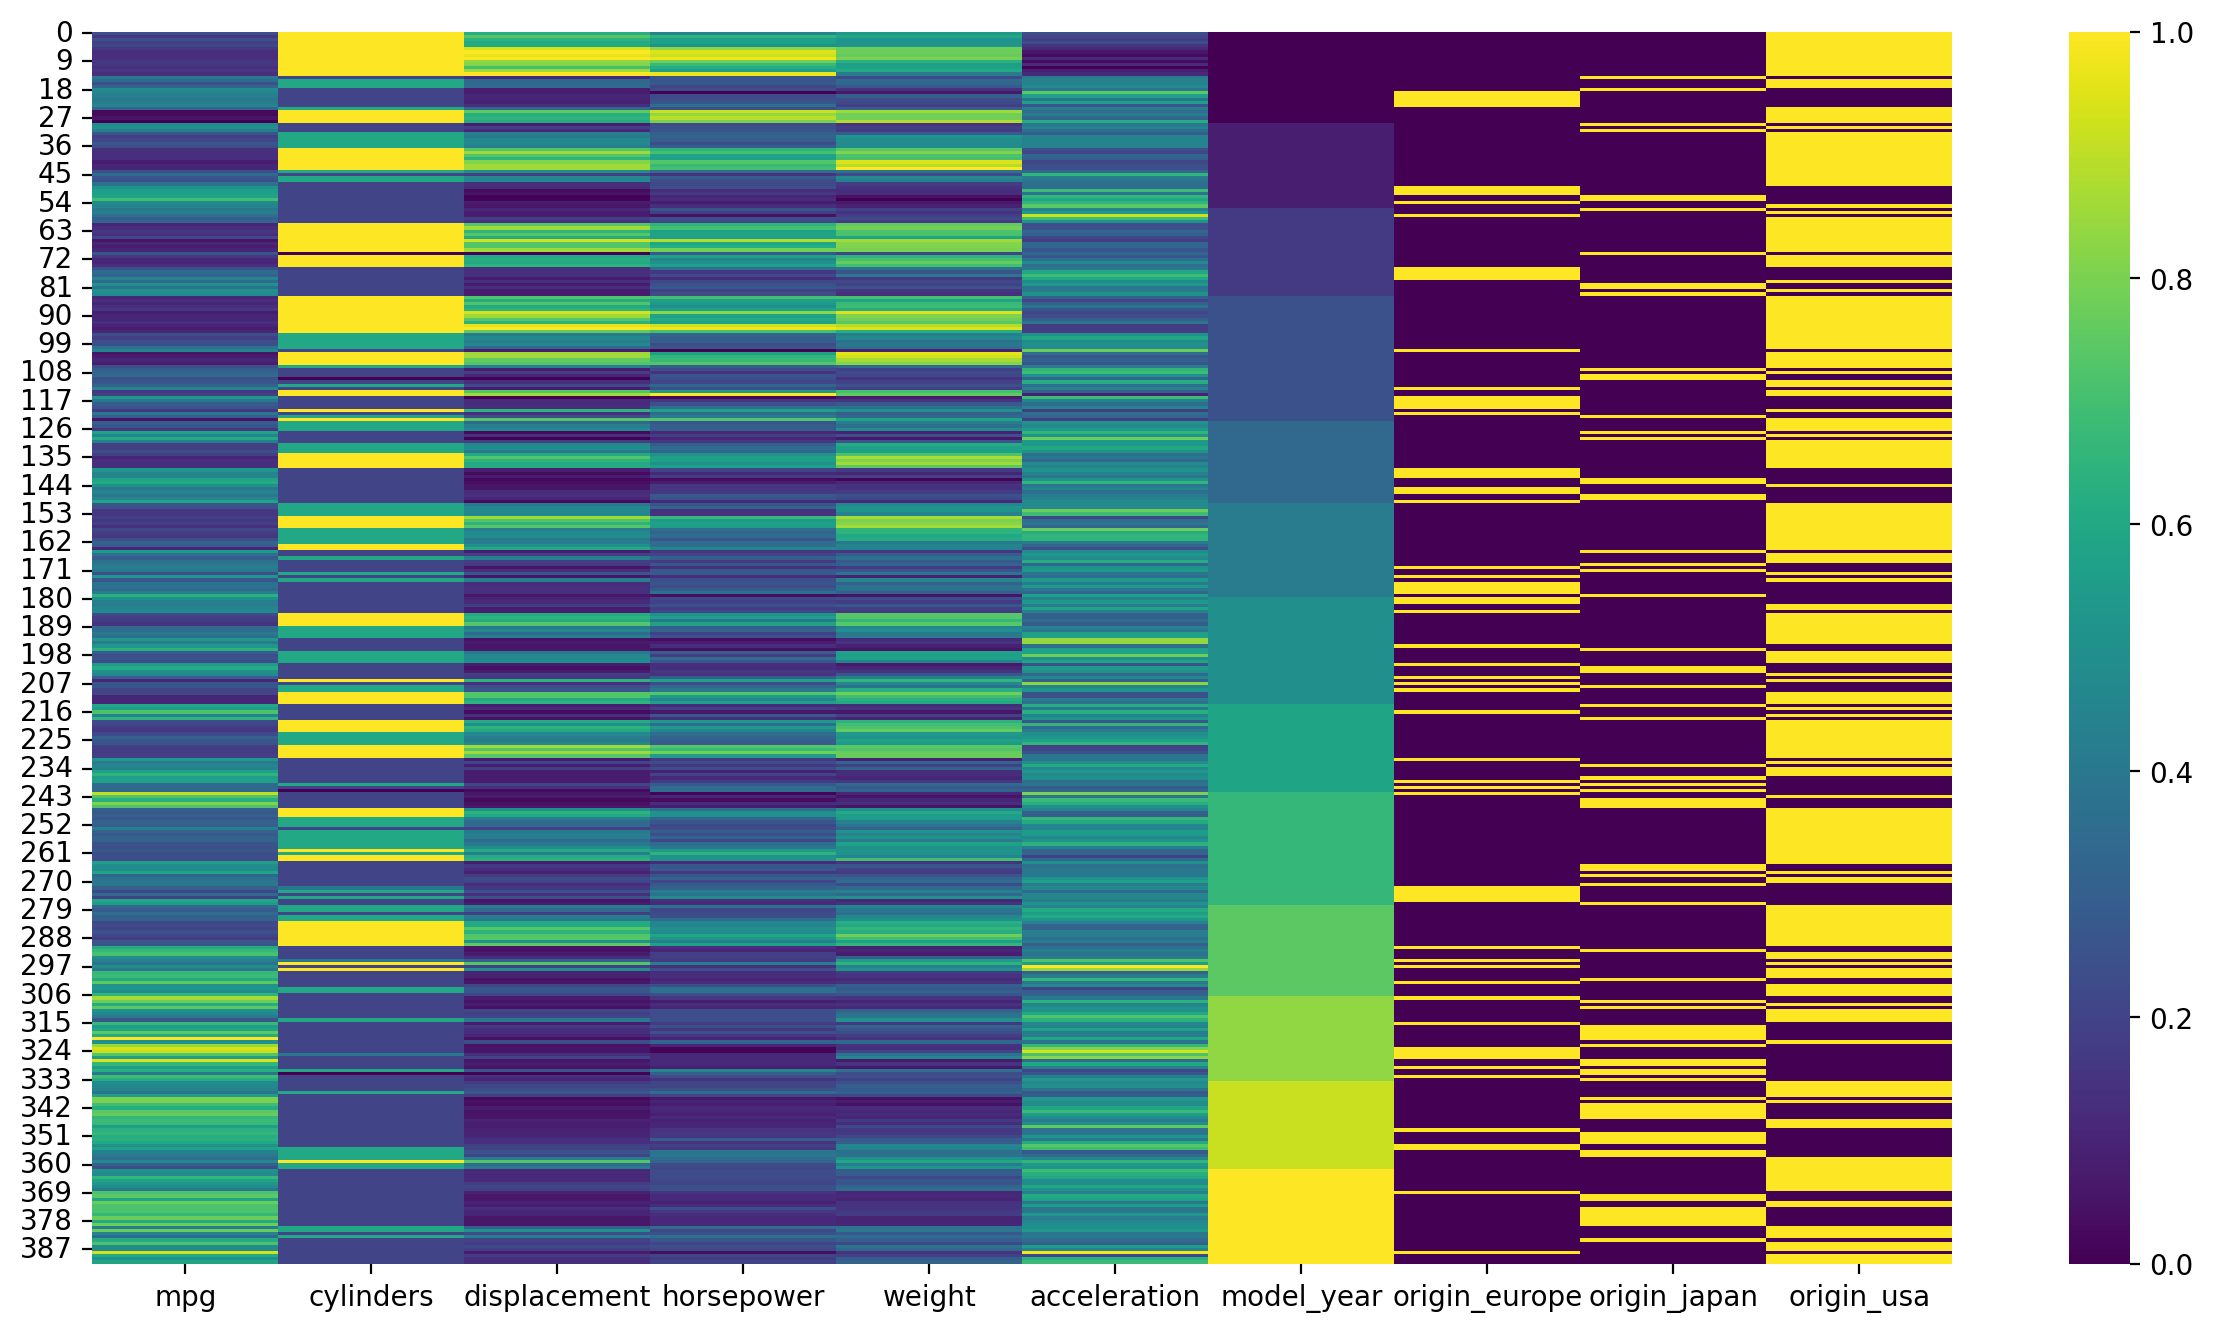

In [38]:
plt.figure(figsize=(15, 8), dpi=200)
sns.heatmap(scaled_df, cmap='viridis')
plt.show()

Здесь каждая строка - это автомобиль. В колнках - отдельные признаки, причём, после масштабирования, все значения меняются от 0 до 1.  

В правой части мы видим только два цвета - причина в том, что это дамми переменные со значениями 0 и 1. По колонке model_year наблюдается градиент цвета из-за того, что в исходном датафрейме все данные были отсортированы по этой колонке. Для всех остальных колонок - наблюдаются различные значения в диапазоне от 0 до 1.

<Figure size 3000x1600 with 0 Axes>

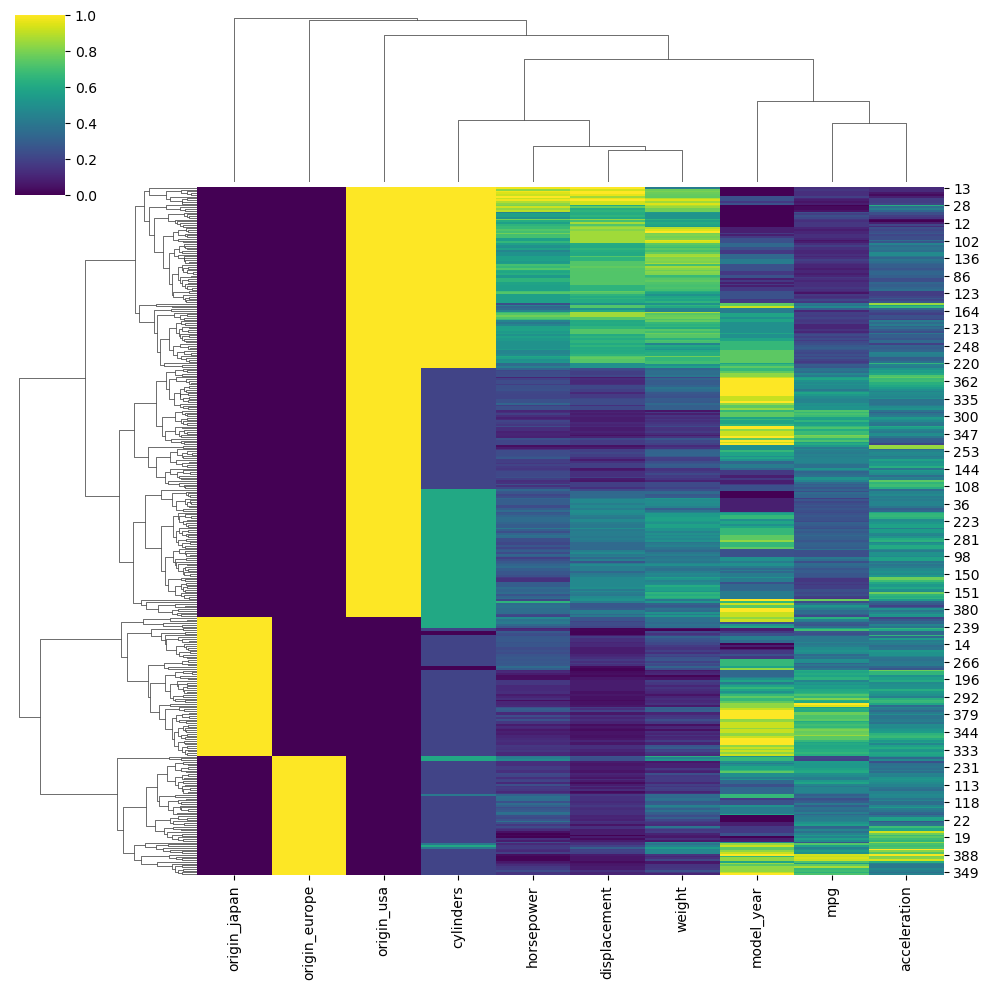

In [42]:
plt.figure(figsize=(15, 8), dpi=200)
sns.clustermap(scaled_df, cmap='viridis')
plt.show()

По умолчанию seaborn выполняет кластеризацию как по строкам, так и по колонкам.

* Расстояние между двумя строками вычисляется в n-мерном пространстве признаков. Мы берём две строки, берём разницу значений первого признака (первый признак одной строки минус первый признак второй строки), эту разницу возводим в квадрат, далее делаем то же самое для второго признака, прибавляем к общей сумме, и так далее по всем признакам. Получаем некоторое расстояние между двумя строками.
* Расстояние между двумя колонками вычисляется точно так же, просто колонки и строки меняются местами. Мы берём две колонки, берём разницу значений этих двух колонок для первой строки (значение в первой строке одного признака минус значение в первой строке второго признака), эту разницу возводим в квадрат, далее делаем то же самое для второй строки,  прибавляем к общей сумме, и так далее по всем строкам. Получаем некоторое расстояние между двумя колонками.

Так как на этом графике каждая строка - это отдельный автомобиль, то хотелось бы сгруппировать вместе похожие автомобили, т.е. именно строки. Группировку колонок в таком случае можно отключить, за это отвечает параметр `col_cluster=False`. 

Кластеризация колонок позволяет понять, какие признаки похожи друг на друга, но для этой цели можно также вычислить корреляции между признаками (в нашей задаче это не требуется). Можно заметить, что дамми переменные объединяются в кластеры в самую последнюю очередь, причина в том, что они больше всего отличаются от других признаков (поскольку дамми переменные принимают только значения 0 и 1, то расстояние между ними - максимально возможное).

Признаки displacement и weight, а также mpg и acceleration - являются похожими друг на друга, хотя первые два признака ближе друг к другу чем вторые два. Такой вывод сделан на основе высоты вертикальных линий, которые являются невысокими.

Таким образом мы получаем общее понимание того, какие признаки связаны друг с другом.

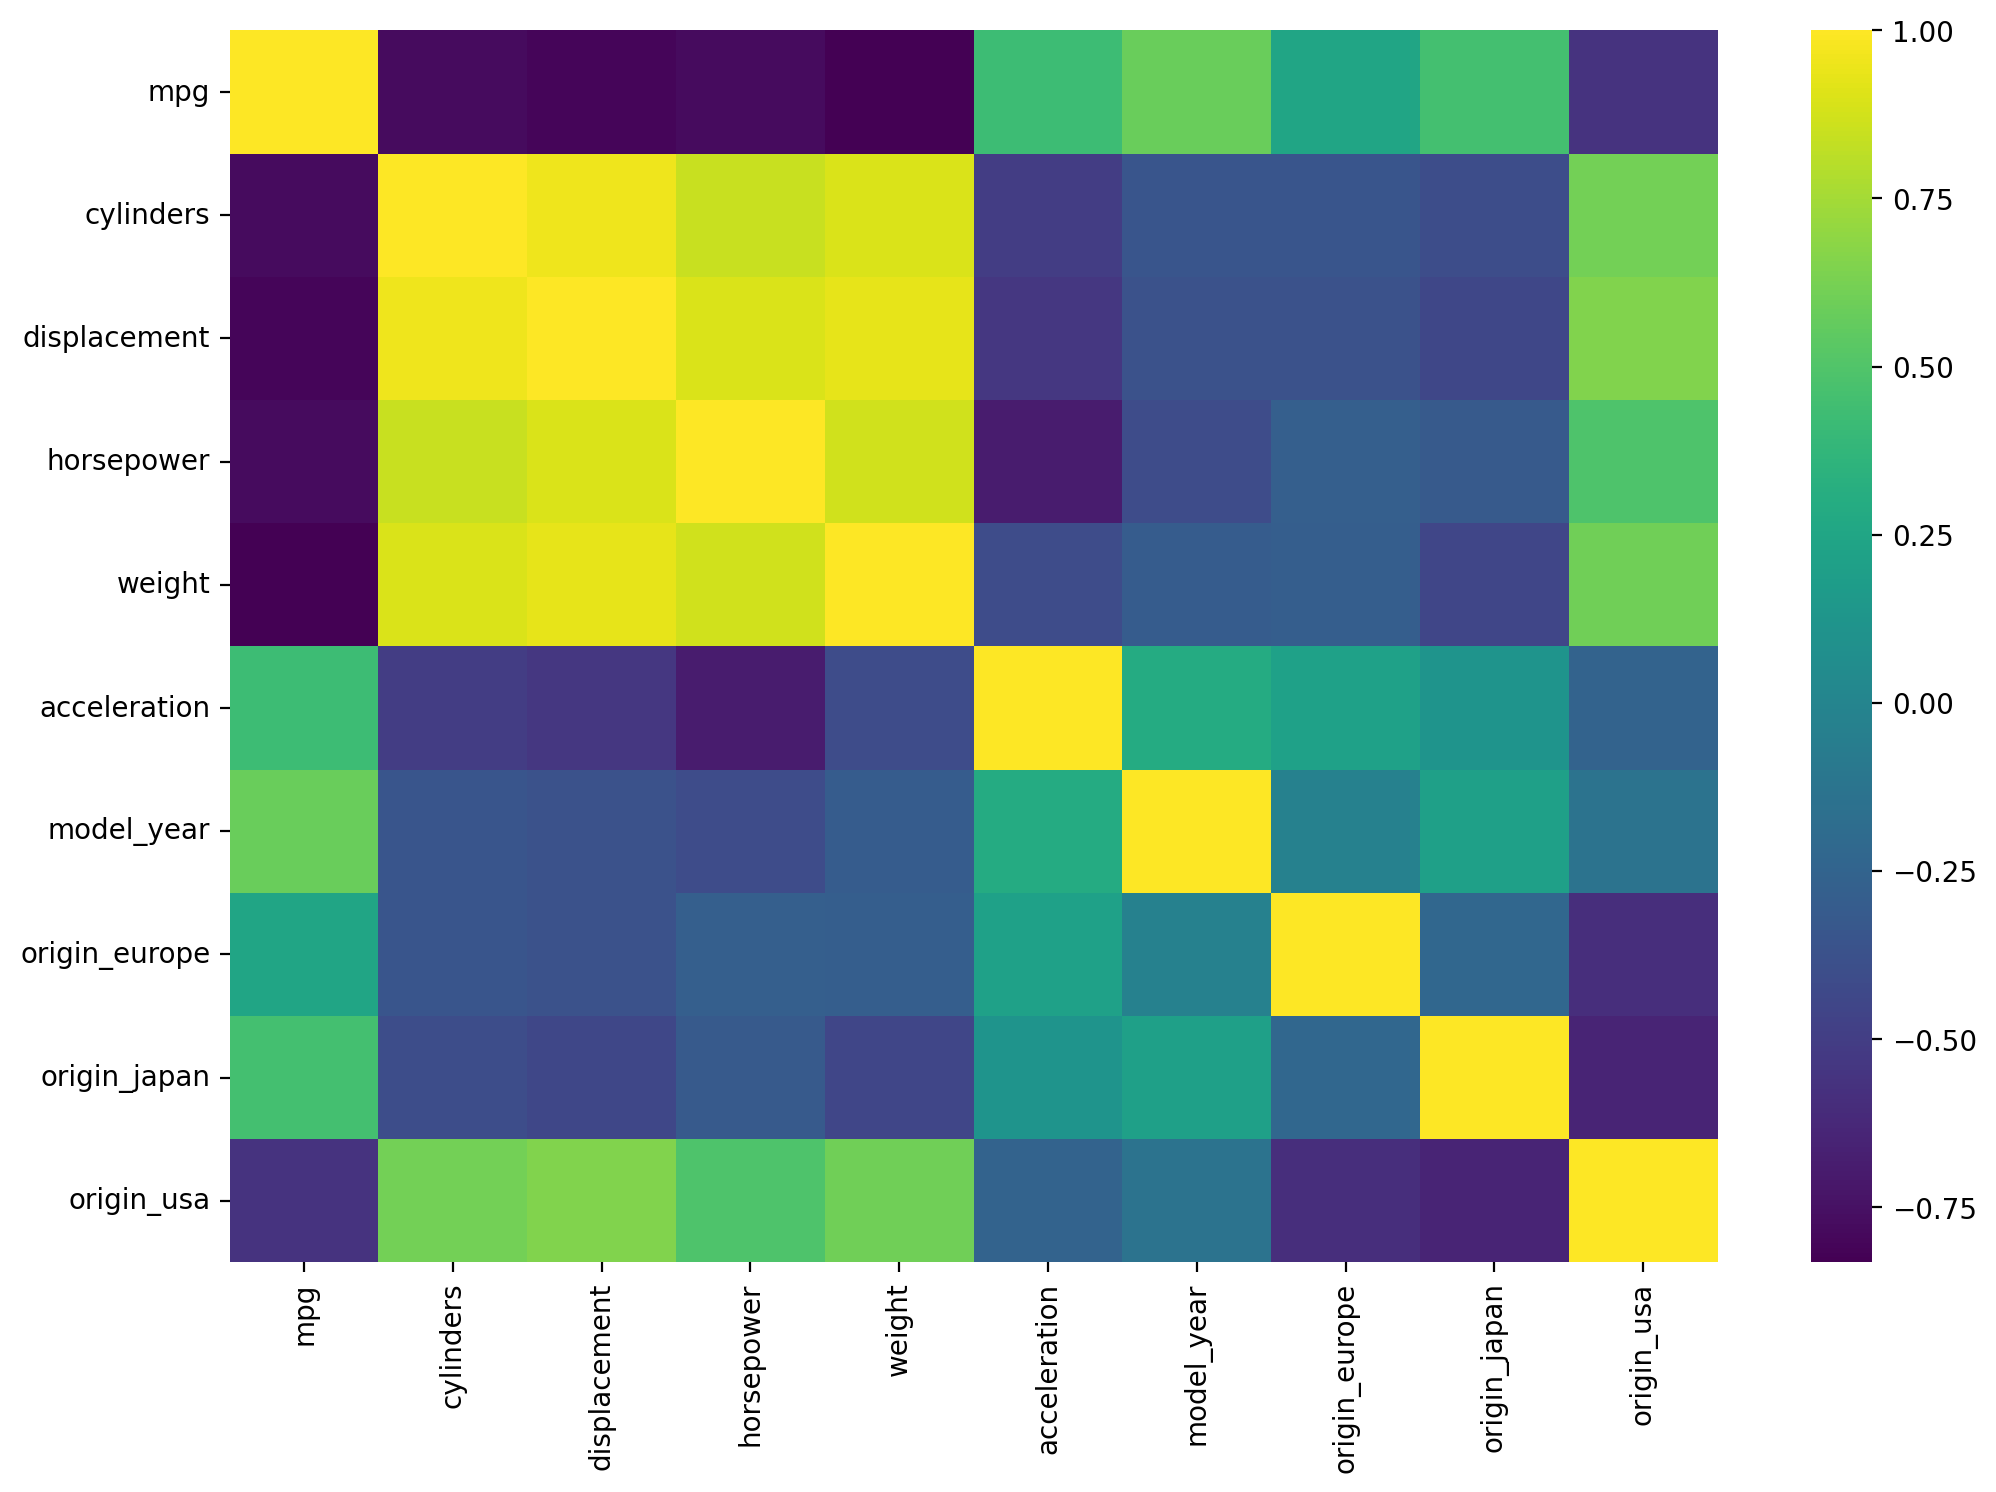

In [49]:
# Получим ту же самую информацию
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(scaled_df.corr(), cmap='viridis')
plt.show()

<Figure size 3000x1600 with 0 Axes>

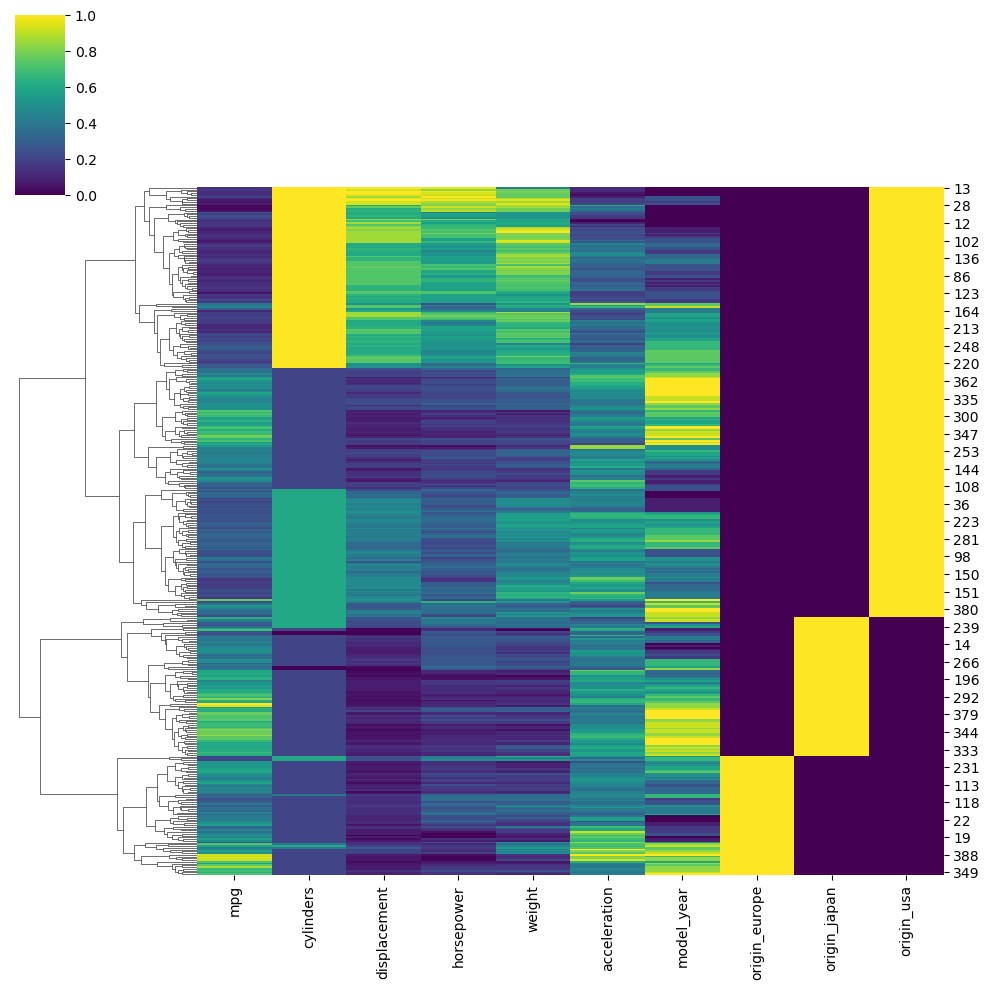

In [51]:
plt.figure(figsize=(15, 8), dpi=200)
sns.clustermap(scaled_df, cmap='viridis',col_cluster=False)
plt.show()

Здесь все данные расположились таким образом, что сверху находится большой набор автомобилей для origin_usa. Далее, внутри origin_usa можно заметить, что следующее разбиение на большие части выполняется по колонке cylinders - это категориальная колонка, если бы эта переменная была непрерывной, то такого разбиения, скорее всего, не получилось бы.

**Для очень больших наборов данных seaborn не сможет построить такой график! Также seaborn не сможет вернуть результаты с номерами кластеров для строк (в нашем случае номера кластеров для отдельных автомобилей).**

# Иерархическая кластеризация в Scikit-Learn

## Создание модели

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
model = AgglomerativeClustering(n_clusters=4)

In [62]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


Получим номера кластеров

In [65]:
cluster_labels = model.fit_predict(scaled_df)

In [67]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

Получаем набор чисел от 0 до 3, так как мы указали 4 кластера.

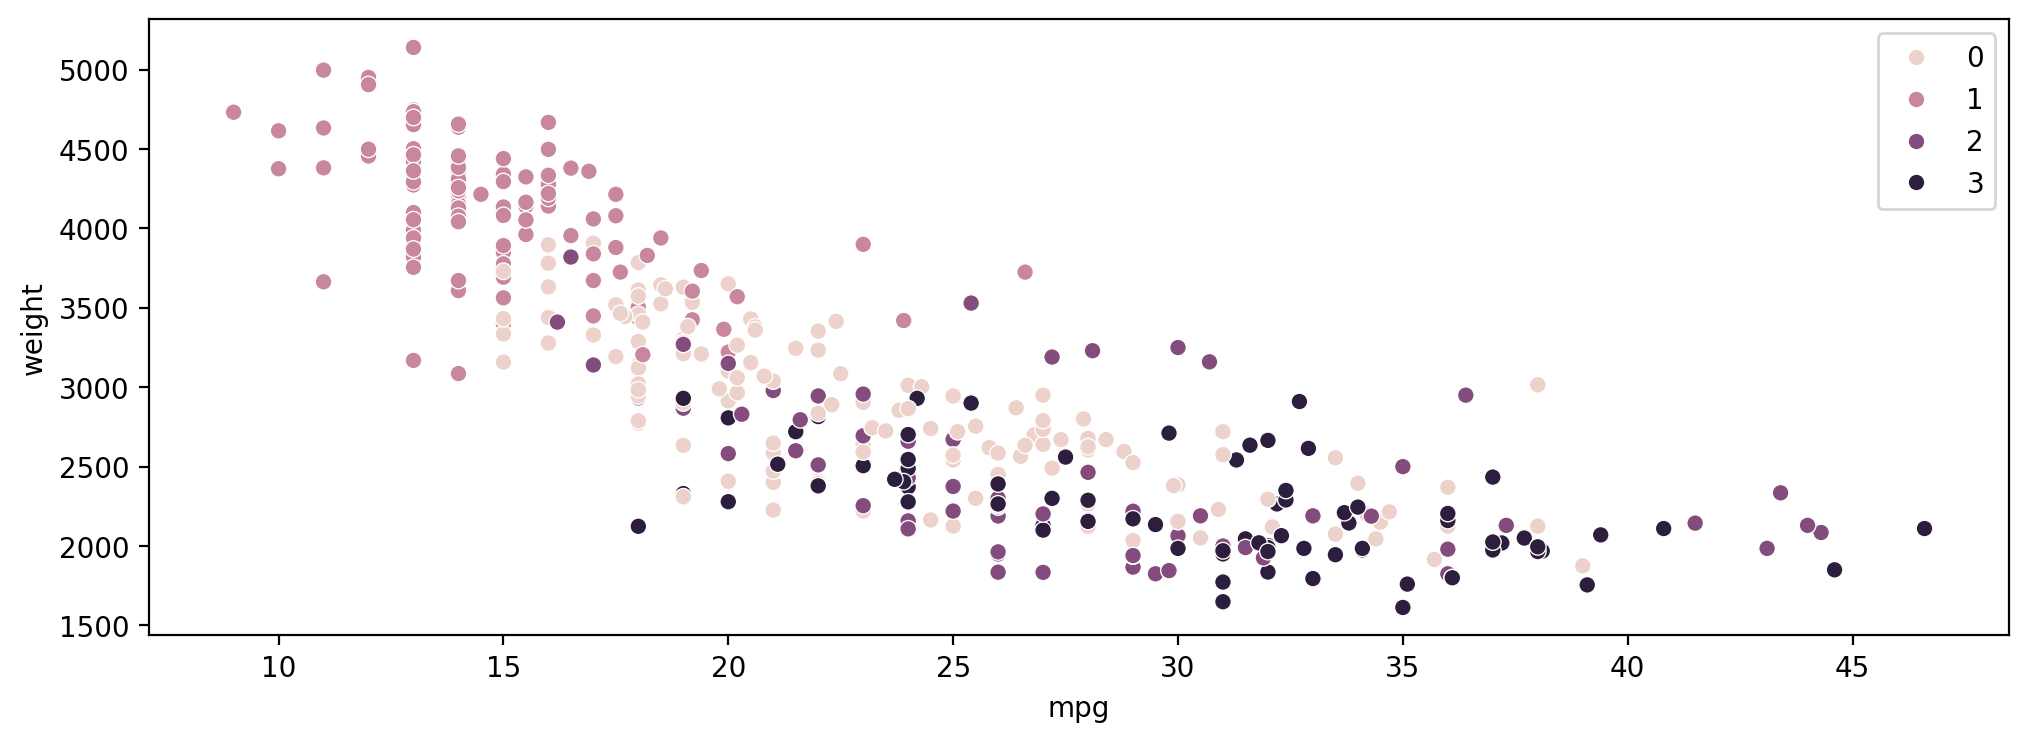

In [70]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels)
plt.show()

Интерпретация кластеров - наиболее сложный этап в процессе кластеризации данных, т.к. нет однозначно правильного ответа, с которым можно было бы свериться.

На данном графике, можно увидеть некоторый набор точек в левом верхнем углу, которые имеют похожие кластеры - это тяжёлые автомобили с низкими значениями mpg.  
Более тёмные цвета, кластер под номером 3 - это более лёгкие автомобили, с более высокими значениями mpg.

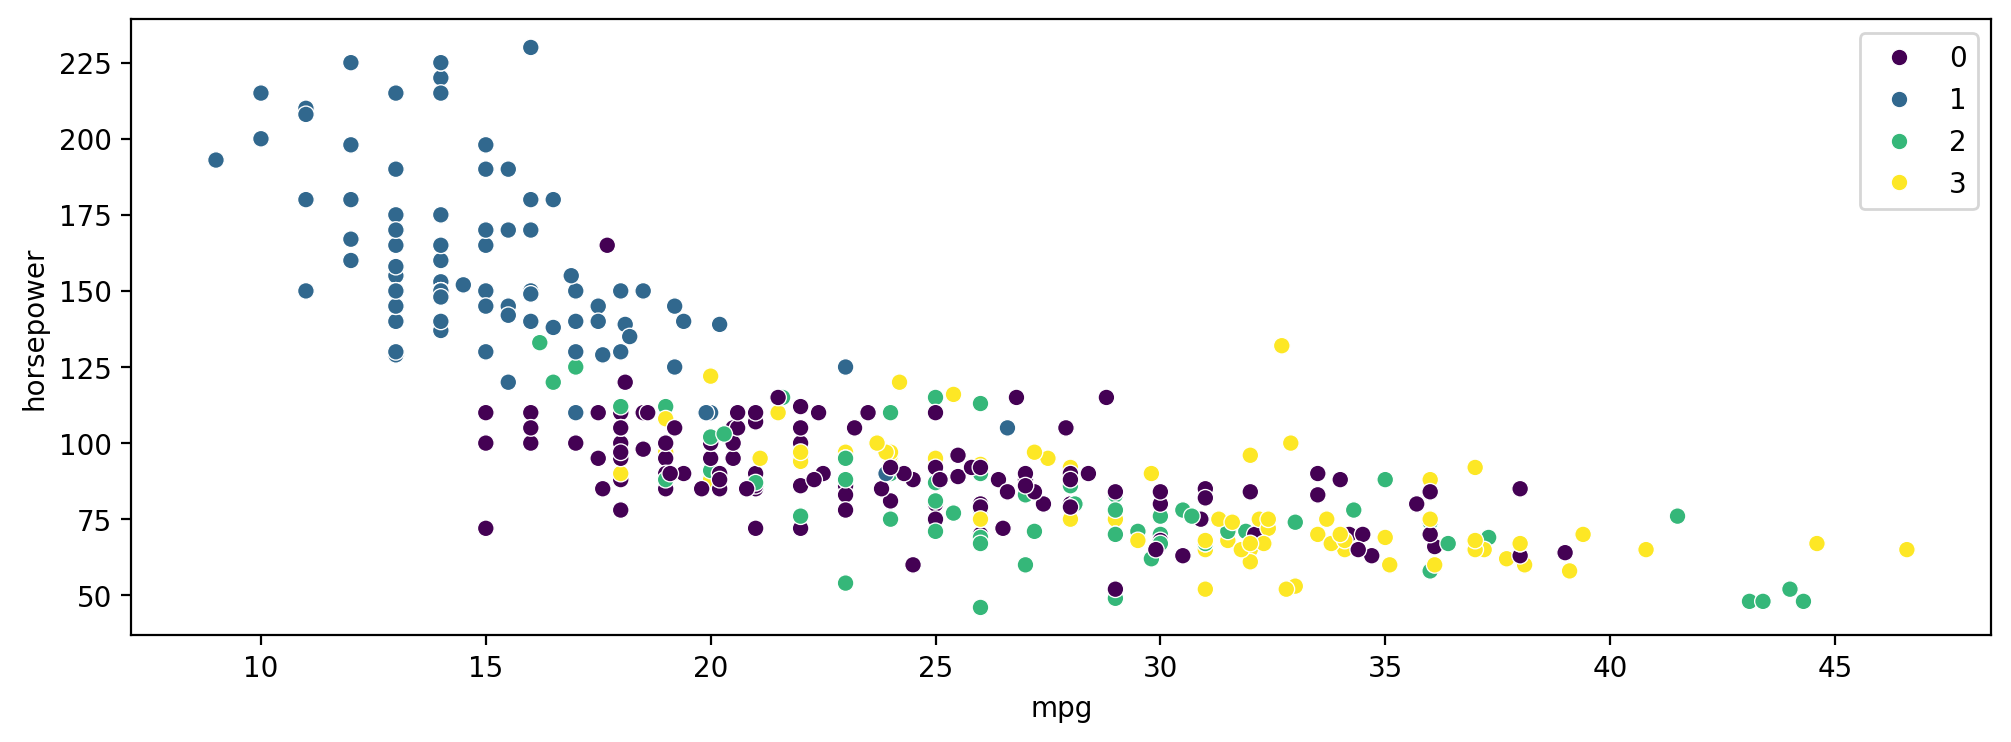

In [75]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')
plt.show()

In [77]:
model_3 = AgglomerativeClustering(n_clusters=3)

In [79]:
cluster_labels_3 = model_3.fit_predict(scaled_df)

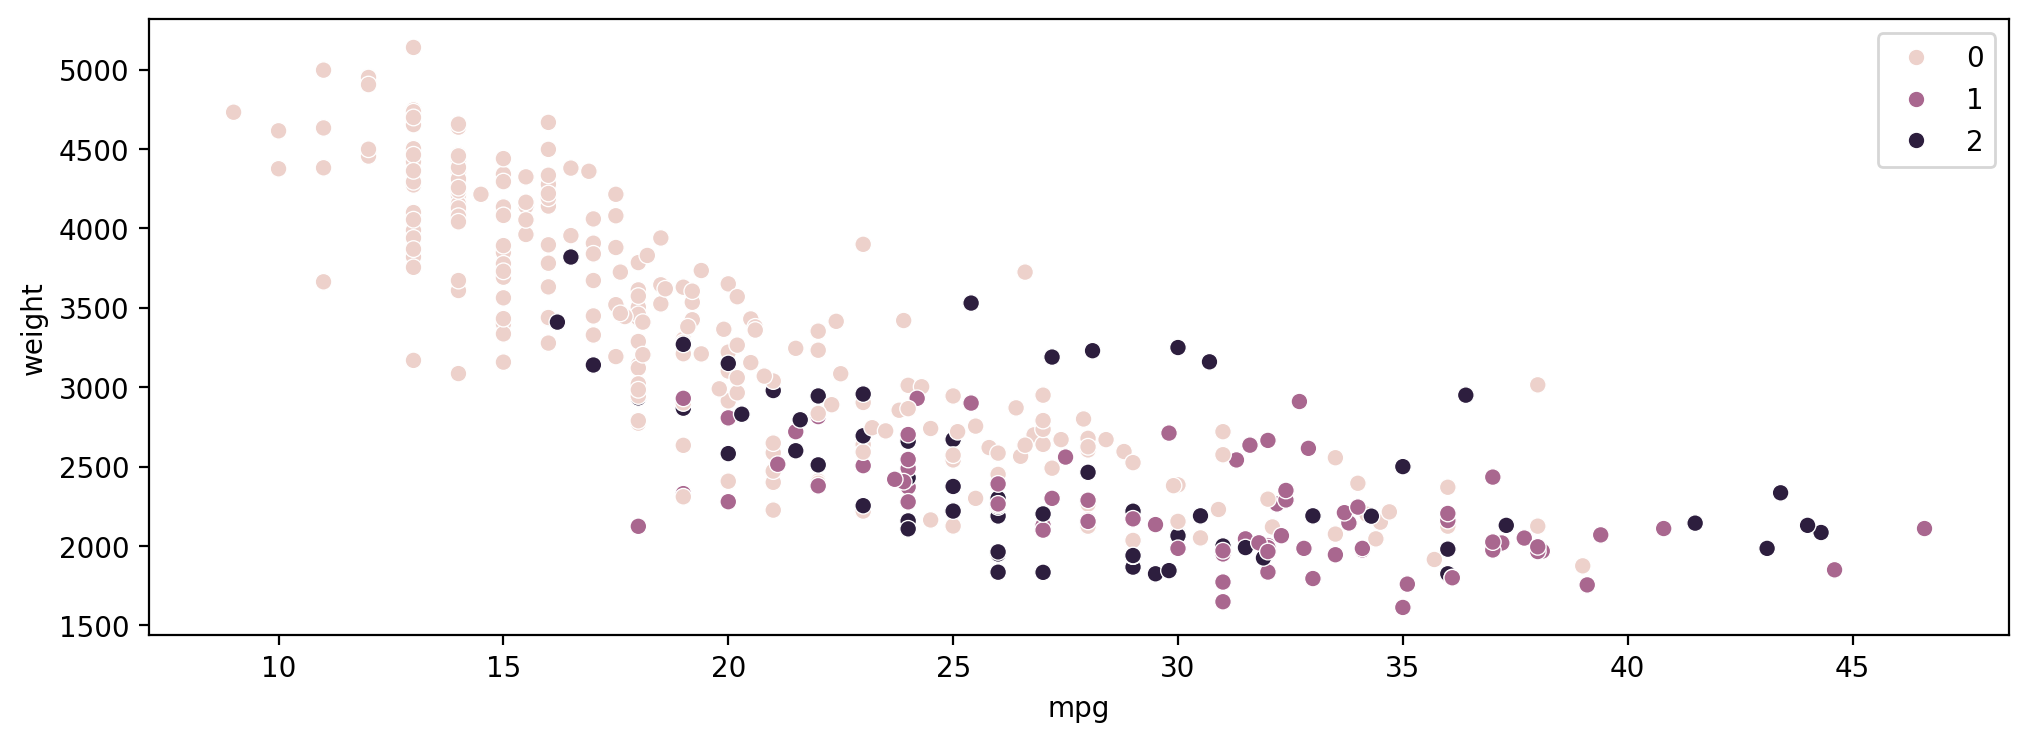

In [81]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels_3)
plt.show()

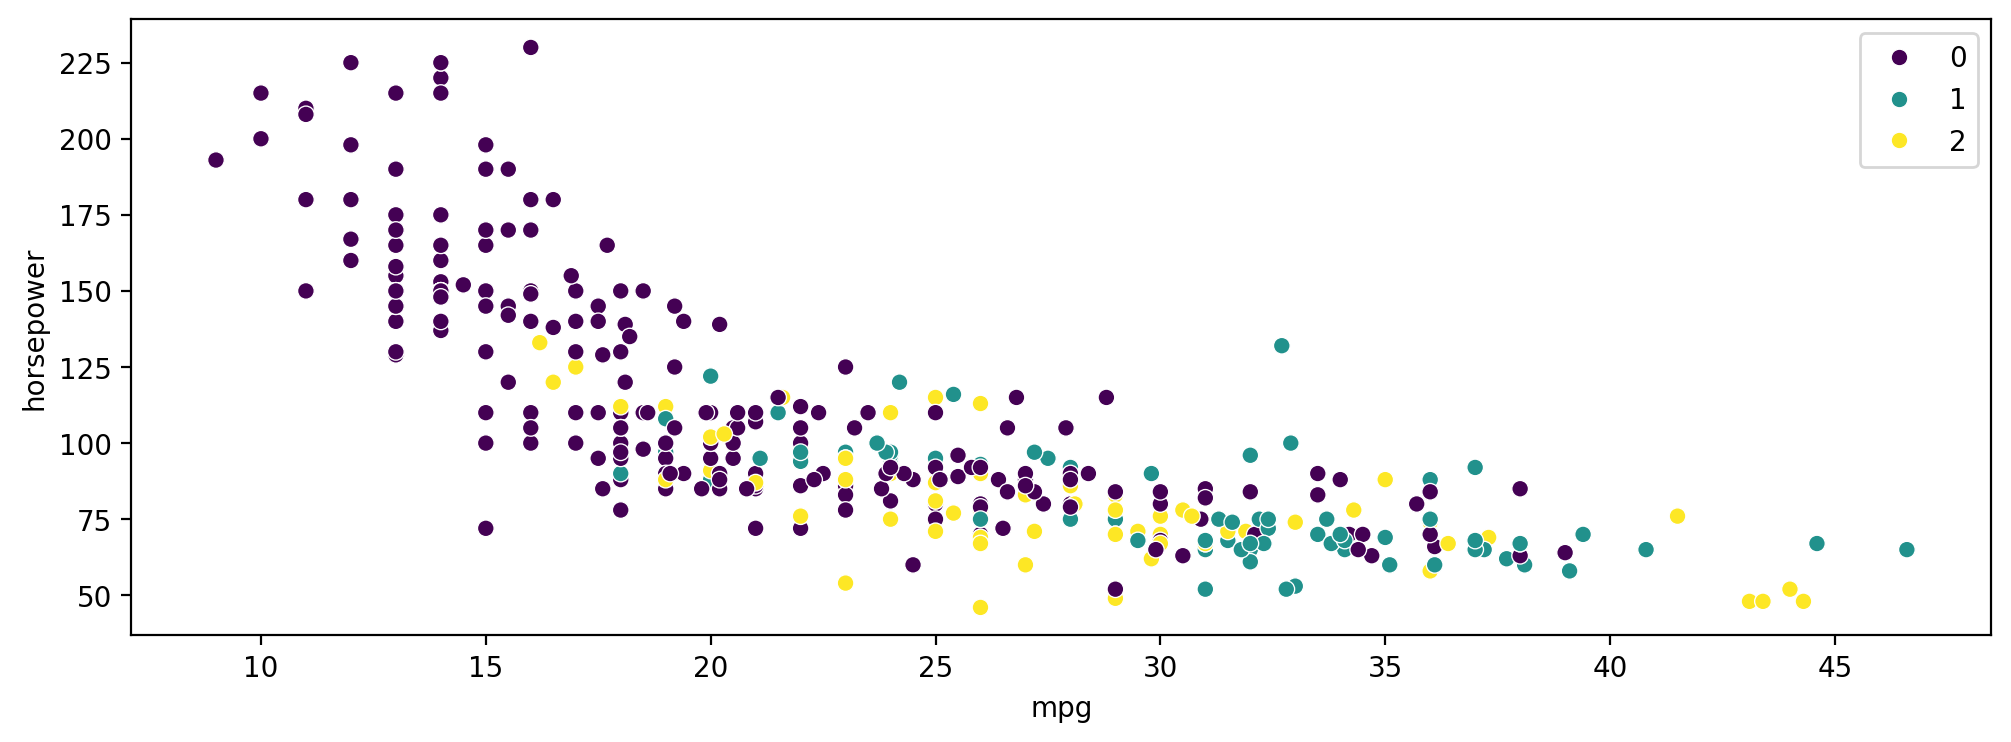

In [83]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels_3, palette='viridis')
plt.show()

Для трёх кластеров видим более плавное распределение точек вдоль горизонтальной оси.

## Определяем количество кластеров с помощью дендрограмм
Документация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

### Предположим в начале, что каждая точка это отдельный кластер

Для `AgglomerativeClustering` параметр `metric` (в старых версиях `affinity`) - это та метрика, с помощью которой вычисляется расстояние между точками или кластерами (по умолчанию - Евклидова метрика).

Поскольку ранее было выполнено масштабирование с помощью `MinMaxScaler` - то каждое из чисел меняется в диапазоне от 0 до 1. Это значит что каждое из слагаемых в сумме, изображенной на формуле:

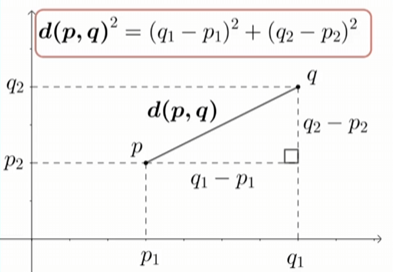

не может быть больше 1, потому что максимальное расстояние для одного признака - это когда одна координата равна 1, а другая 0. В итоге, суммируются все слагаемые для отдельных признаков, причём каждое из этих слагаемых <= 1. Получается, что общее расстояние между двумя точками не может быть больше чем $\sqrt{}$ из количества таких слагаемых, т.е. $\sqrt{N features}$ от количества признаков.

In [93]:
len(scaled_df.columns)

10

In [95]:
np.sqrt(10)

np.float64(3.1622776601683795)

Это максимальное расстояние между двумя точками. 

Параметр `distance_threshold` (имеет значение None по умолчанию) - пороговое значение для расстояния linkage distance, выше которого кластеры уже не будут объединяться между собой.

In [109]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [111]:
cluster_labels = model.fit_predict(scaled_df)

In [113]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [106]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

**Матрица связей - Linkage Matrix**  
Источник: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

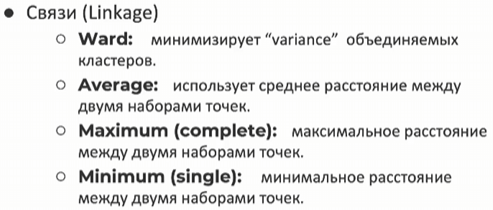

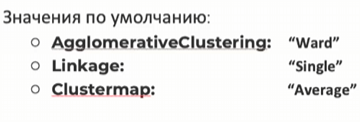

Для `AgglomerativeClustering` параметр называется `linkage`.

Для `linkage` и `clustermap` параметр называется `method`.

In [117]:
linkage_matrix = hierarchy.linkage(scaled_df.values, method='ward')

In [119]:
# Поменяем форматирование чисел, чтобы 
# сделать их более читаемыми
np.set_printoptions(suppress=True)

In [121]:
linkage_matrix

array([[ 67.        ,  68.        ,   0.0401977 ,   2.        ],
       [232.        , 234.        ,   0.0412867 ,   2.        ],
       [ 63.        ,  74.        ,   0.04316861,   2.        ],
       ...,
       [778.        , 779.        ,  10.74105893, 245.        ],
       [775.        , 777.        ,  12.18934549, 147.        ],
       [780.        , 781.        ,  19.30749251, 392.        ]])

По строке: первые два числа - пара из дух кластеров (кластер с номером 67 и кластер с номером 68), третья колонка - расстояние между этими двумя кластерами, четвёртая колонка - количество точек в этих двух кластерах. 

На самом нижнем уровне дендрограммы - видим объединение отдельных точек в кластеры из двух точек; на более верхних уровнях дендрограммы уже объединяются более крупные кластеры между собой, так, на самой вершине дендрограммы, в четвёртой колонке видно больше количество точек.

Эта матрица содержит числовые данные для того, чтобы на их основе нарисовать визуальный график дендрограммы. 

**Для большого количества данных построение такого графика может привести к ошибке!**

In [123]:
# Такую матрицу можно получить также с помощью:
np.c_[model.children_, model.distances_]

array([[ 67.        ,  68.        ,   0.0401977 ],
       [232.        , 234.        ,   0.0412867 ],
       [ 63.        ,  74.        ,   0.04316861],
       ...,
       [778.        , 779.        ,  10.74105893],
       [775.        , 777.        ,  12.18934549],
       [780.        , 781.        ,  19.30749251]])

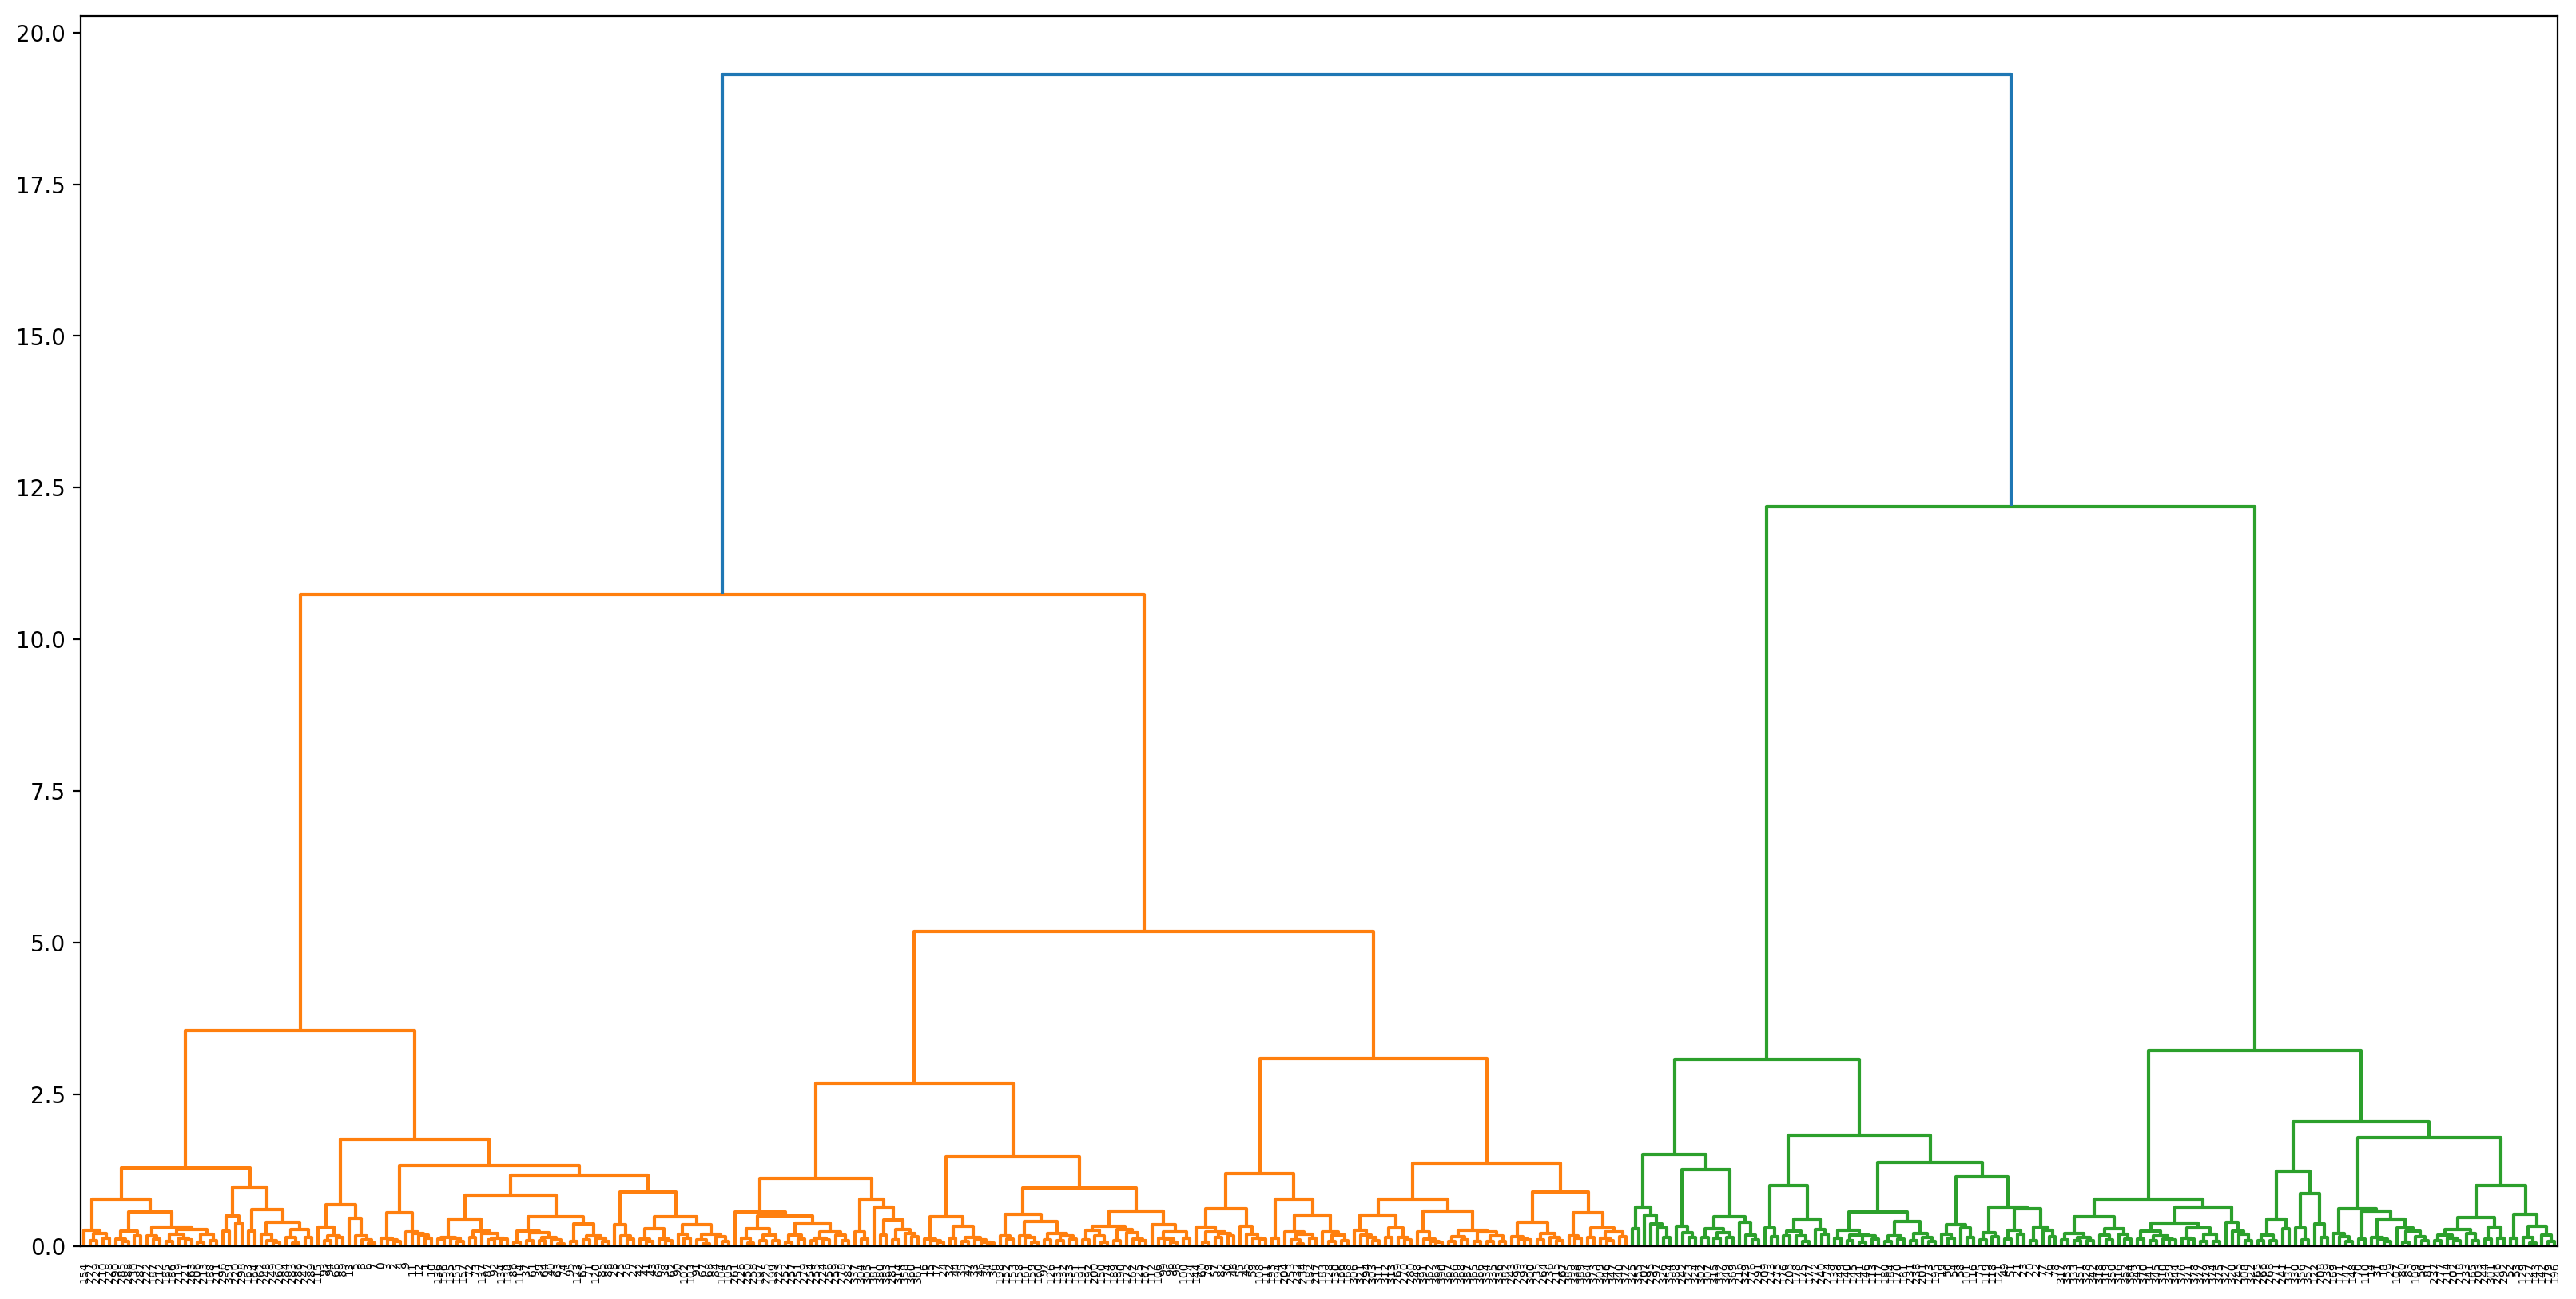

In [127]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix)
plt.show()

Здесь по горизонтальной оси X указаны различные номера автомобилей, которые соответствуют номерам кластеров, которые в данном случае состоят каждый из одной точки.

В самом низу графика находятся пары из двух кластеров, а в самом верху - видно более крупные кластеры.

Для `dendrogram`, есть метод `truncate_mode` - в нём можно указать два значения 'lastp' или 'level':
* Значение 'lastp' означает, что берётся только p кластеров и затем, построение иерархии останавливается
* Значение 'level' означает, что берётся только p уровней и затем, построение иерархии останавливается
В обоих случаях надо указать некоторое число p.

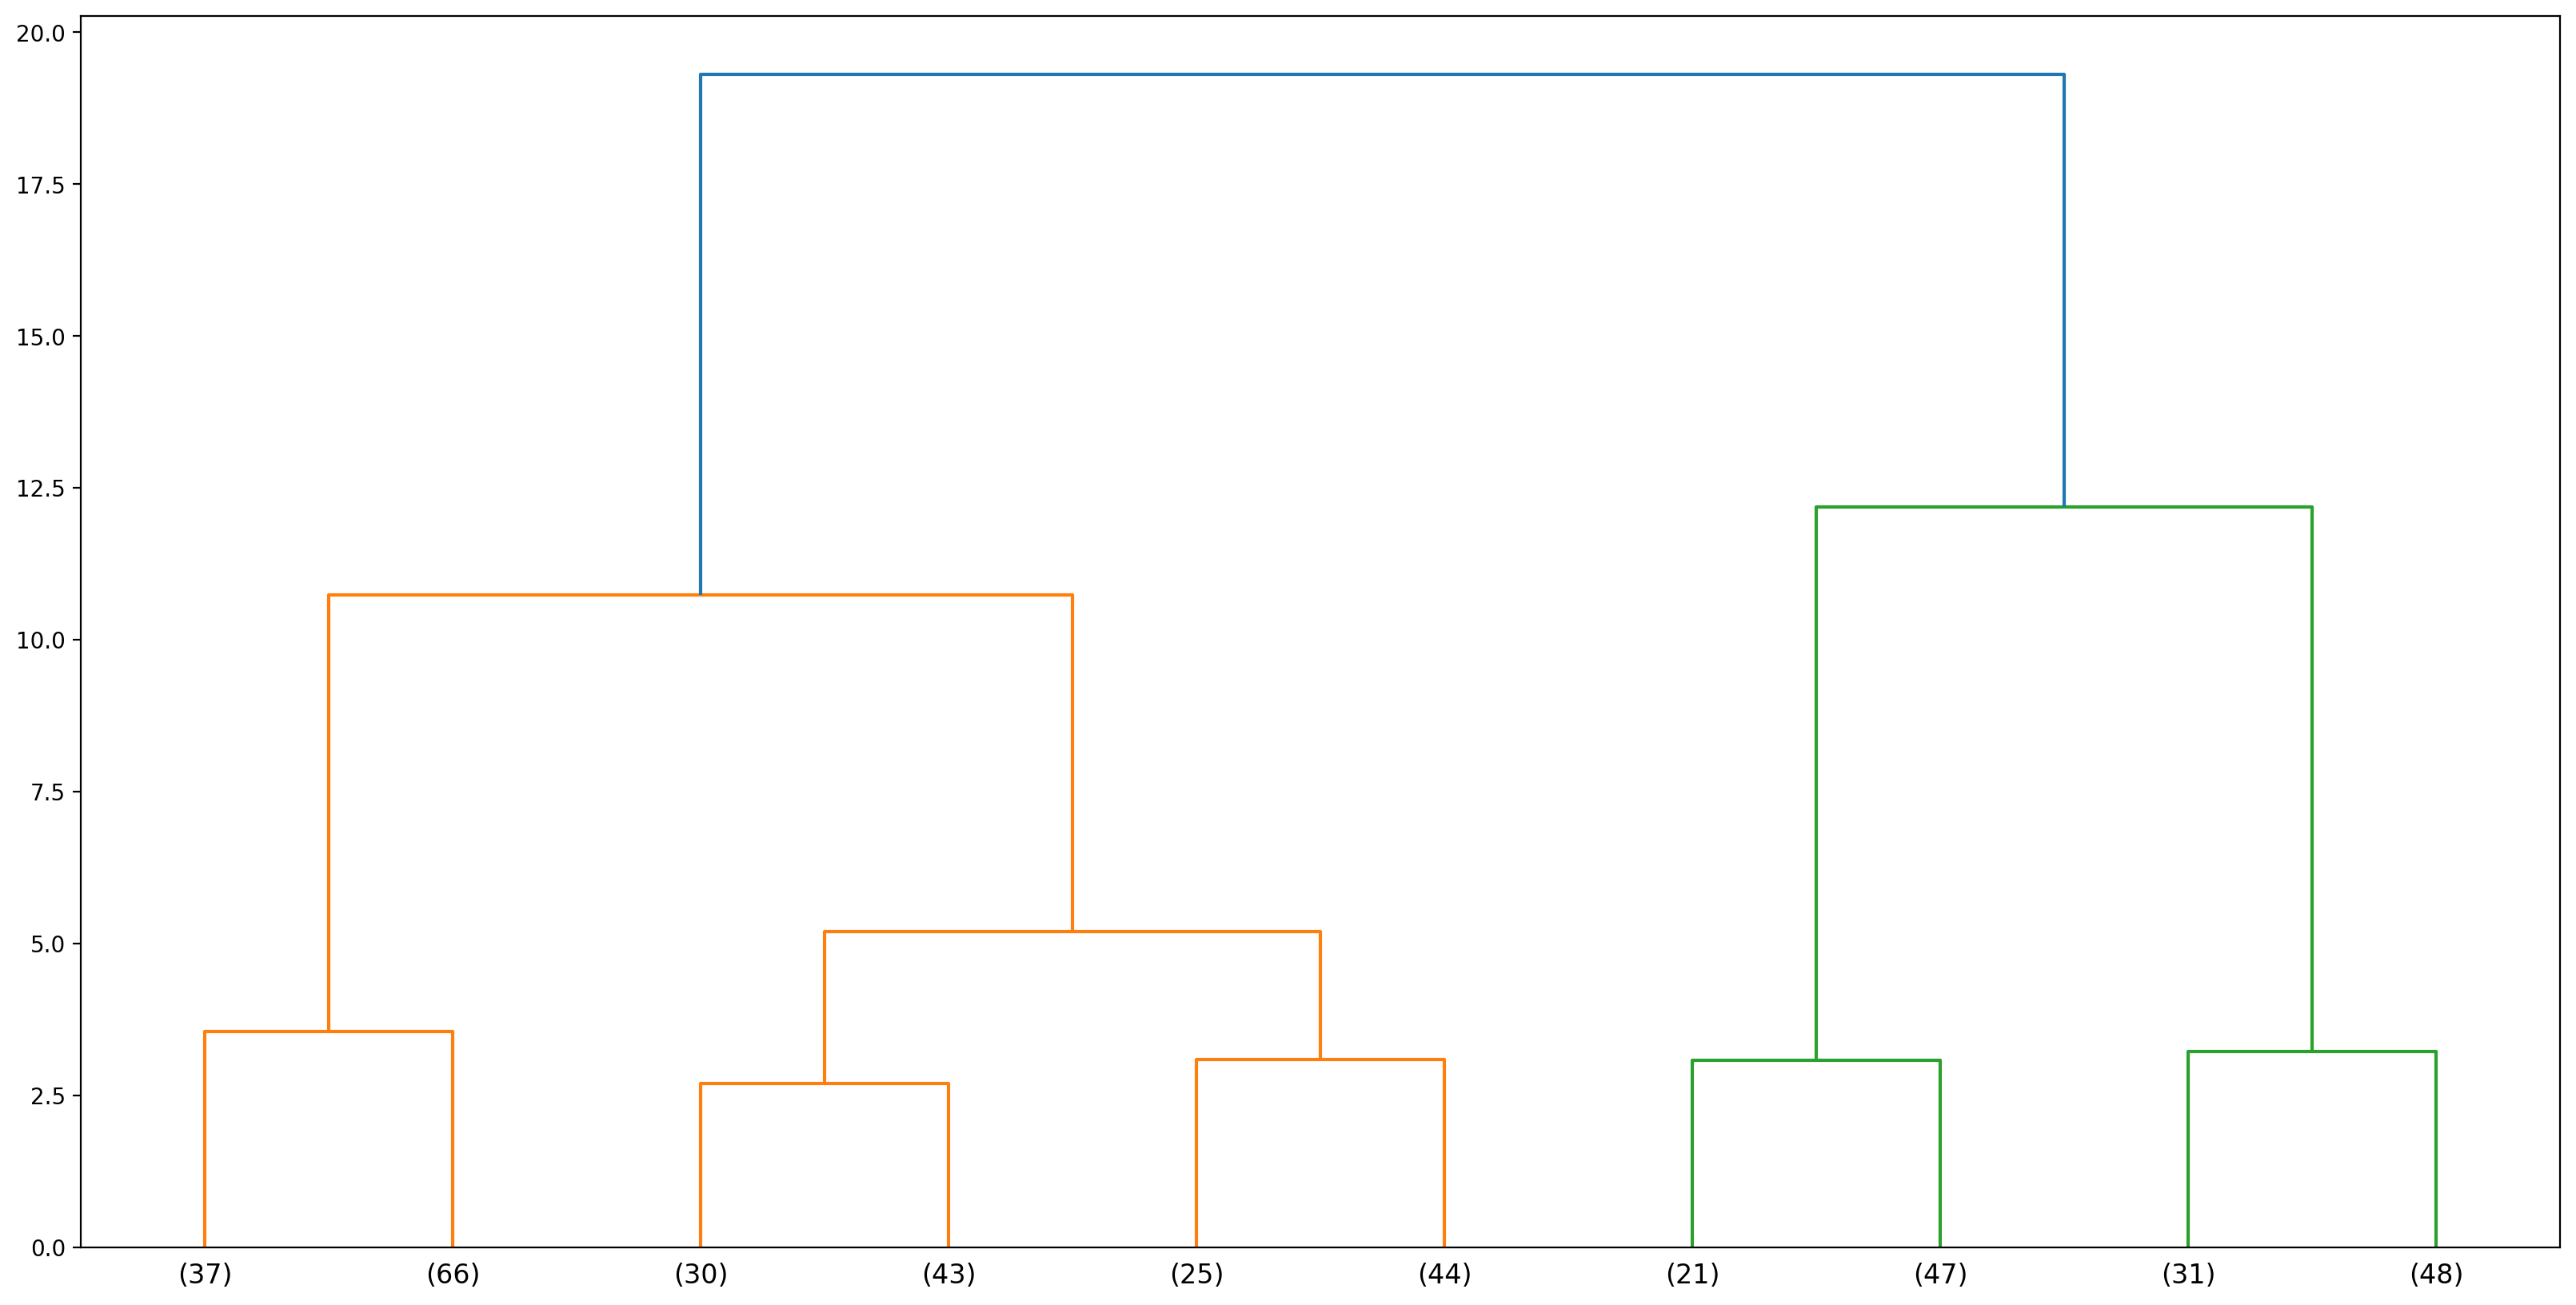

In [131]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.show()

Здесь объединены только 10 кластеров в иерархию, а затем была произведена остановка. Однако, при таком усечении дерева, мы получаем только фрагмент от общей картины. По оси X здесь могут указываться не только номера исходных кластеров, но и те кластеры, которые получились в результате иерархического объединения кластеров, из-за чего они могут не всегда легко интерпретироваться, так как для их понимания понадобится матрица `linkage_matrix` из которой уже будет понятно, из чего состоят эти объединения кластеров.

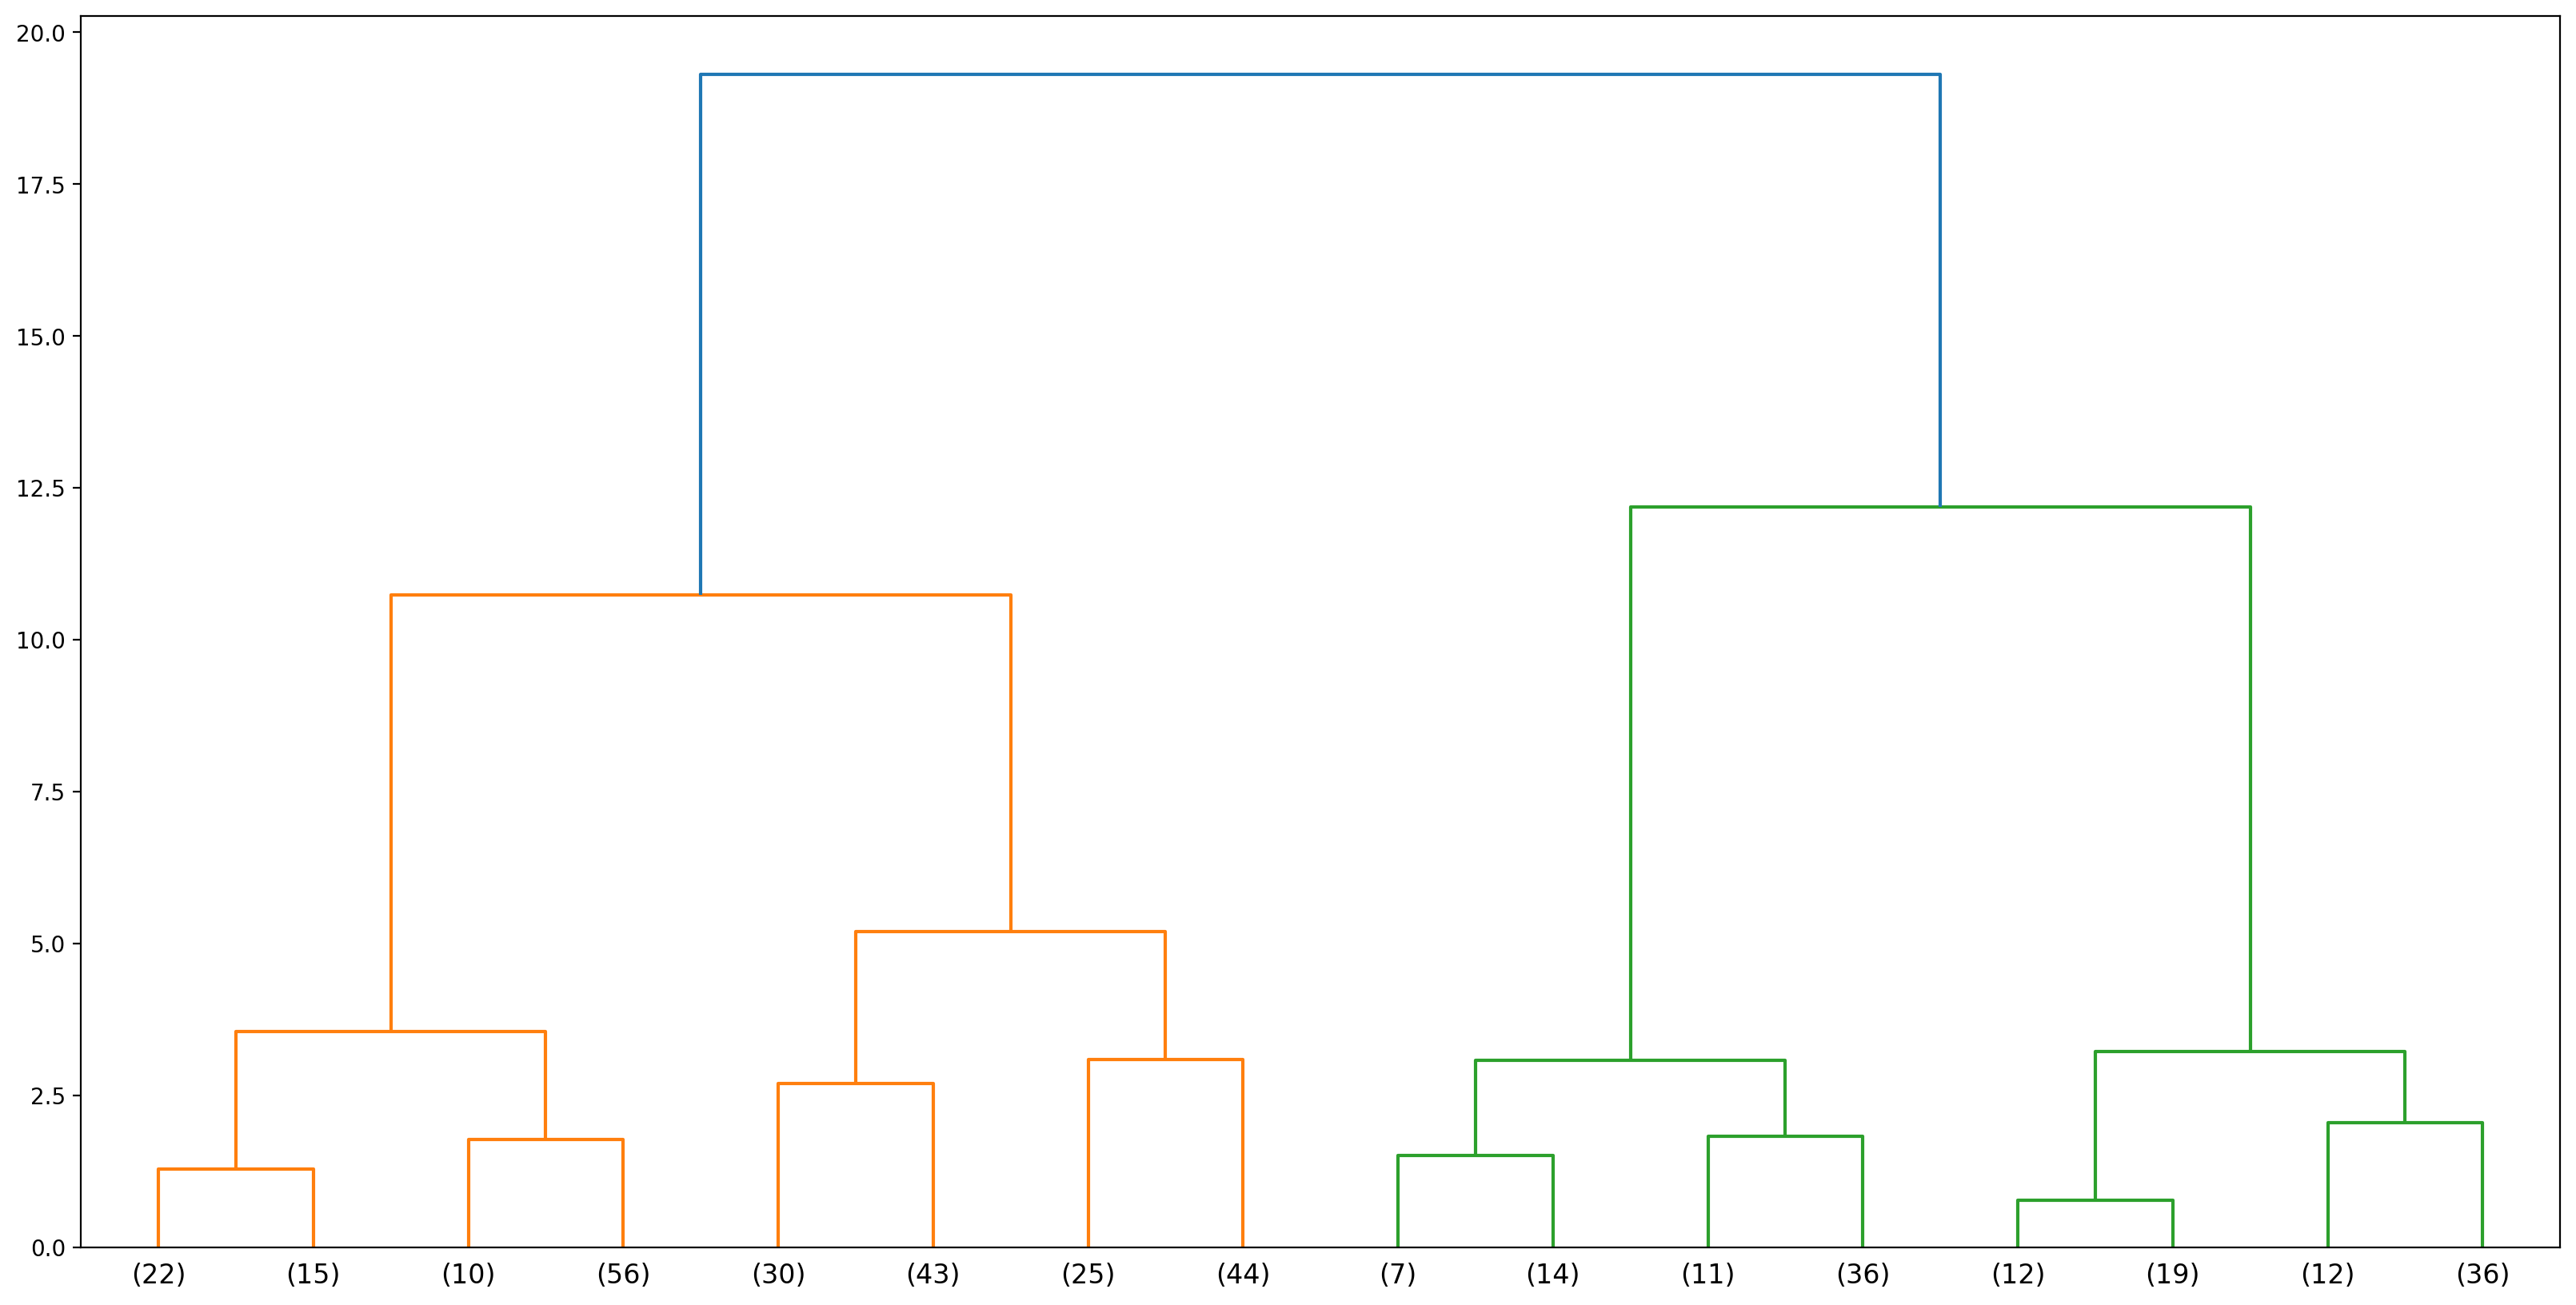

In [134]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

Получены три уровня иерархии кластеров, при этом финальное объединение кластеров на самом верху - не считается отдельным уровнем.

## Выбираем пороговое значение - Threshold Distance
Чему равно расстояние между двумя точками?

In [138]:
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,0.384200,0.207580,0.0,0.212766,0.365691,0.531915,1.0
cylinders,392.0,0.494388,0.341157,0.0,0.200000,0.200000,1.000000,1.0
displacement,392.0,0.326646,0.270398,0.0,0.095607,0.214470,0.536822,1.0
horsepower,392.0,0.317768,0.209191,0.0,0.157609,0.258152,0.434783,1.0
weight,392.0,0.386897,0.240829,0.0,0.173589,0.337539,0.567550,1.0
acceleration,392.0,0.448888,0.164218,0.0,0.343750,0.446429,0.537202,1.0
model_year,392.0,0.498299,0.306978,0.0,0.250000,0.500000,0.750000,1.0
origin_europe,392.0,0.173469,0.379136,0.0,0.000000,0.000000,0.000000,1.0
origin_japan,392.0,0.201531,0.401656,0.0,0.000000,0.000000,0.000000,1.0
origin_usa,392.0,0.625000,0.484742,0.0,0.000000,1.000000,1.000000,1.0


Максимально возможное расстояние по Евклидовой метрике будет равно:

In [141]:
np.sqrt(len(scaled_df.columns))

np.float64(3.1622776601683795)

Далеко не факт, что это расстояние будет где-то достигаться.

In [144]:
scaled_df['mpg'].max()

1.0000000000000002

In [146]:
scaled_df['mpg'].idxmax()

320

Автомобиль с индексом 320 имеет максимальное значение mpg.

In [155]:
scaled_df['mpg'].idxmin()

28

Автомобиль с индексом 28 имеет минимальное значение mpg.

Теперь вычислим евклидово расстояние между ними:

In [161]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [163]:
distance = np.linalg.norm(car_a - car_b)

In [165]:
distance

np.float64(2.3852929970374714)

Скорее всего максимально возможное расстояние между двумя точками равное 3.16 не достигается.

**ВАЖНО: расстояние между двумя точками - это не то же самое, что расстояние между двумя кластерами!**

In [169]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [171]:
cluster_labels = model.fit_predict(scaled_df)

In [173]:
cluster_labels 

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

Мы получили кластера с номерами от 0 до 10 - 11 разных кластеров.

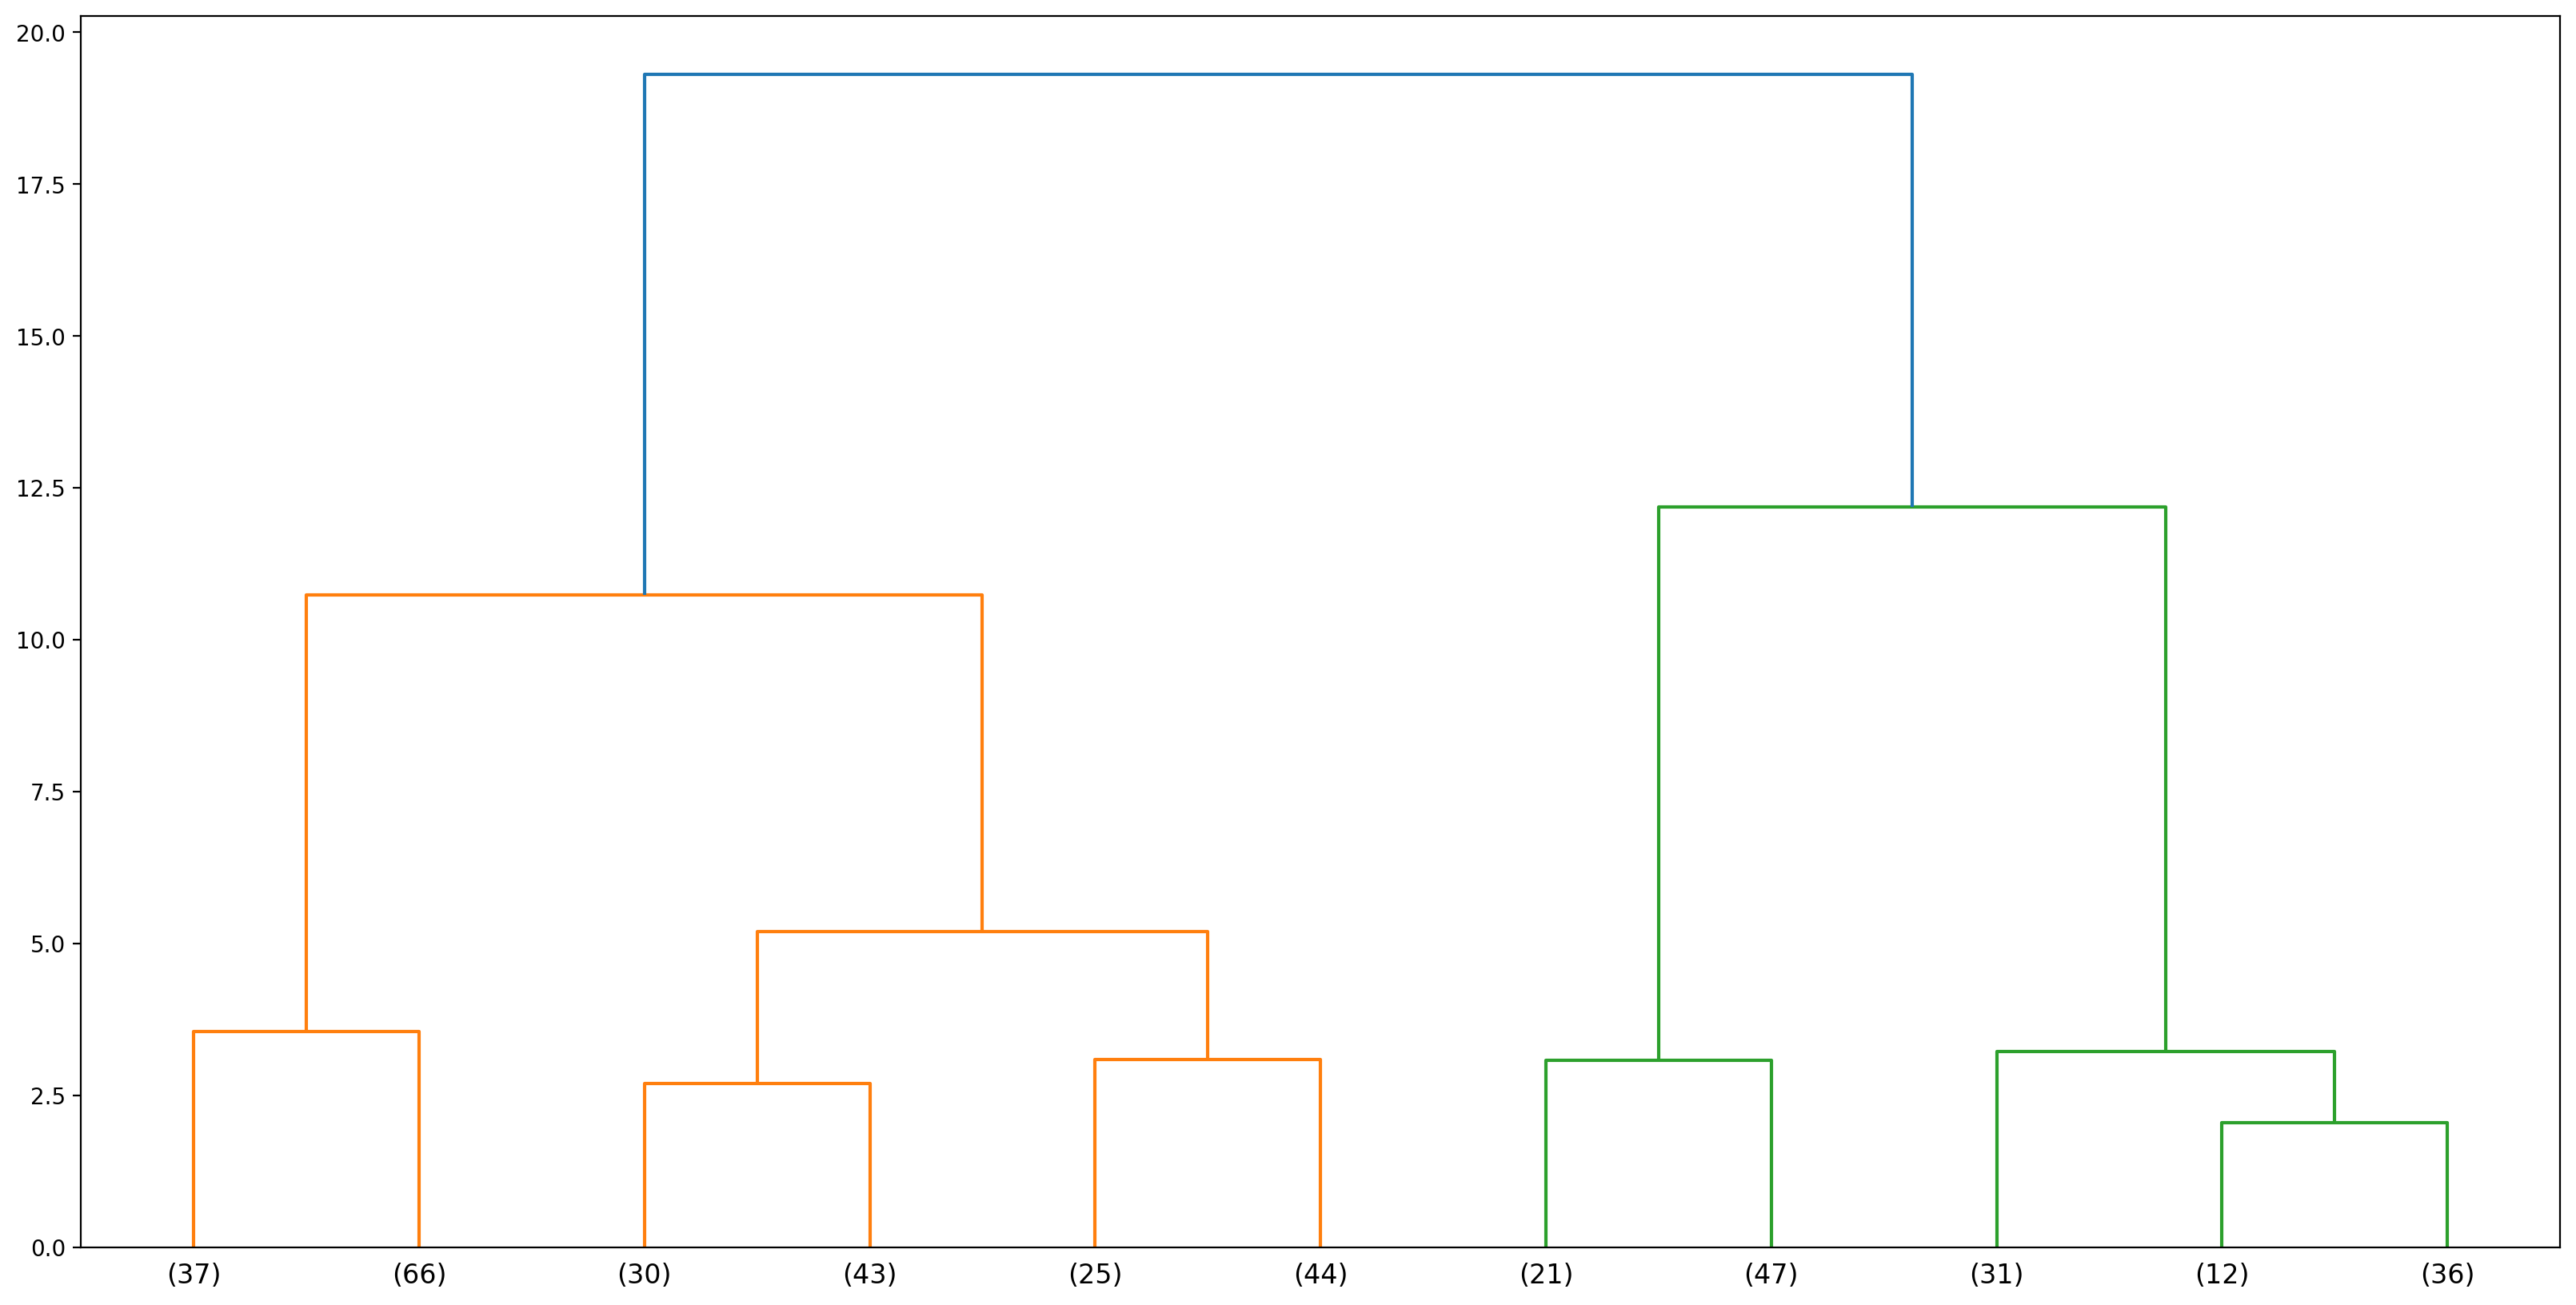

In [176]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11)
plt.show()